# Elucidata Work

Introduction


Cells are the basic units that make up the human body. Cells grow and divide to make new cells as the body needs them. Usually, cells die when they get too old or damaged. Then, new cells take their place.
Cancer begins when genetic changes interfere with this orderly process. Cells start to grow uncontrollably. These cells may form a mass called a tumor. A tumor can be cancerous or benign. A cancerous tumor is malignant, meaning it can grow and spread to other parts of the body. A benign tumor means the tumor can grow but will not spread.

Pancreatic cancer begins in the tissues of your pancreas — an organ in your abdomen that lies behind the lower part of your stomach. Your pancreas releases enzymes that aid digestion and produces hormones that help manage your blood sugar.
Key facts
Cancer is the second leading cause of death globally, and is responsible for an estimated 9.6 million deaths in 2018. Globally, about 1 in 6 deaths is due to cancer.
Approximately 70% of deaths from cancer occur in low- and middle-income countries.
Around one third of deaths from cancer are due to the 5 leading behavioral and dietary risks: high body mass index, low fruit and vegetable intake, lack of physical activity, tobacco use, and alcohol use.
Tobacco use is the most important risk factor for cancer and is responsible for approximately 22% of cancer deaths 
 
Cancer is a leading cause of death worldwide, accounting for an estimated 9.6 million deaths in 2018. The most common cancers are:
Lung (2.09 million cases)
Breast (2.09 million cases)
Colorectal (1.80 million cases)
Prostate (1.28 million cases)
Skin cancer (non-melanoma) (1.04 million cases)
Stomach (1.03 million cases)

The most common causes of cancer death are cancers of:
Lung (1.76 million deaths)
Colorectal (862 000 deaths)
Stomach (783 000 deaths)
Liver (782 000 deaths)
Breast (627 000 deaths)

Pancreatic cancer begins in the tissues of your pancreas — an organ in your abdomen that lies behind the lower part of your stomach. Your pancreas releases enzymes that aid digestion and produces hormones that help manage your blood sugar.

1. Pancreatic Adenocarcinoma (PAAD) is the third most common cause of death from cancer, with an overall 5-year survival rate of less than 5%, and is predicted to become the second leading cause of cancer mortality in the United States by 2030.

2. Cancer mortality can be reduced if cases are detected and treated early. In this assignment we are going to analyse the previous data of genes structure to detect the cancer patient and provide early treatment.

3. Genes Structures: Ribonucleic acid (RNA) is a polymeric molecule essential in various biological roles in coding, decoding, regulation and expression of genes. RNA and DNA are nucleic acids, and, along with lipids, proteins and carbohydrates, constitute the four major macromolecules essential for all known forms of life. RNA-Seq (RNA sequencing), is a sequencing technique to detect the quantity of RNA in a biological sample at a given moment.

In [1]:
# Importing All the Packages Which are needed for analysis of dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from GSVA import gsva
from plotnine import *
from sklearn.manifold import TSNE

Data Exploration

The Given dataset of normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 183 pancreatic cancer tumors. The file format is GCT , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.


In [2]:
from cmapPy.pandasGEXpress.parse import parse

In [3]:
data = parse('PAAD.gct')

In [4]:
print(type(data))

<class 'cmapPy.pandasGEXpress.GCToo.GCToo'>


In [5]:
print(data)

GCT1.3
src: PAAD.gct
data_df: [18465 rows x 183 columns]
row_metadata_df: [18465 rows x 0 columns]
col_metadata_df: [183 rows x 124 columns]


In [6]:
#Reading the data From All Dimension
col_meta_data = data.col_metadata_df
row_meta_data = data.row_metadata_df
my_data = data.data_df

Here we parse our dataset into GCToo pandas dataframe instance which contains 3 component dataframes (row_metadata_df, column_metadata_df, and data_df). 
Lets see individual dataframe and explore it

In [7]:
#Checking All the Data
my_data
col_meta_data
row_meta_data
#col_meta_data.head()
#row_meta_data.head()

rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1
...
ZYG11B
ZYX
ZZEF1


In [8]:
#TO get the Shape of Column MEta data
col_meta_data.shape

(183, 124)

86 columns have missing value, and 9659 missing values in dataset


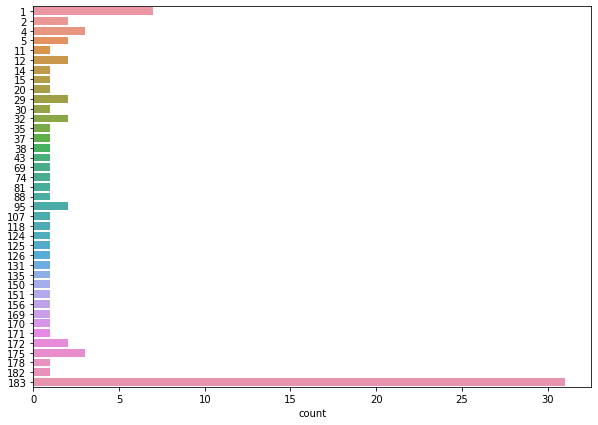

In [9]:
# Number of missing values in each column of column Meta Data
missing_value_of_col = (col_meta_data.isnull().sum())
missing_value_count_of_col = missing_value_of_col[missing_value_of_col > 0].sort_values(ascending=False)
print(f"{len(missing_value_count_of_col)} columns have missing value, and",
      f"{col_meta_data.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(10, 7))
sns.countplot(data=missing_value_count_of_col,y= missing_value_count_of_col )

The above Graph Shows the frequency of missing Value

In [10]:
for column in col_meta_data.columns:
    print(f"{column}:   {len(col_meta_data[column].unique())} unique values:")

participant_id:   178 unique values:
sample_type:   3 unique values:
mRNAseq_cluster:   6 unique values:
bcr_patient_barcode:   178 unique values:
bcr_patient_uuid:   178 unique values:
vital_status:   2 unique values:
days_to_death:   90 unique values:
days_to_last_followup:   85 unique values:
additional_studies:   1 unique values:
adenocarcinoma_invasion:   2 unique values:
age_at_initial_pathologic_diagnosis:   45 unique values:
alcohol_history_documented:   3 unique values:
alcoholic_exposure_category:   6 unique values:
amount_of_alcohol_consumption_per_day:   7 unique values:
anatomic_neoplasm_subdivision:   4 unique values:
anatomic_neoplasm_subdivision_other:   11 unique values:
b_symptoms:   1 unique values:
bcr:   1 unique values:
bcr_aliquot_uuid:   178 unique values:
bcr_canonical_reason-2:   2 unique values:
bcr_canonical_reason-3:   2 unique values:
bcr_canonical_reason:   4 unique values:
bcr_followup_barcode:   151 unique values:
bcr_followup_uuid:   151 unique values:

In [11]:
# droping columns which have constant value
for col in col_meta_data.columns:
    if len(col_meta_data[col].unique())<2:
        col_meta_data.drop(columns=col, inplace=True)

col_meta_data.shape

(183, 83)

Columns metadata explain about behaviour of patient. Lets see the description of some variables of this data.

sample_type: is our target variable which tells that which patient have cancer tumor or not.

participant_id: unique value for each patient.

mRNAseq_cluster: estimates of the levels of individual isoforms within the cell of RNA sequence.

bcr_patient_barcode and bcr_patient_uuid representing the metadata of the participants and their samples.

vital_status: Current status of patient(live/death). (may pose data leakage)

adenocarcinoma_invasion: Tells about cancer grows and spreads to near cell or not.

maximum_tumor_dimension: Size of Tumor, tumor size is strongly related to chances for survival.

pathologic_stage: Stage of cancer (amount or spread of cancer in the body)

pathologic_m: The M refers to whether the cancer has metastasized. This means that the cancer has spread from the 

primary tumor: to other parts of the body

pathologic_n: The N refers to the the number of nearby lymph nodes that have cancer.

pathologic_t: The T refers to the size and extent of the main tumor. The main tumor is usually called the primary tumor.

In [12]:
# Exploring Some Columns to Understand the data 
col_meta_data['sample_type'].unique()# Target Varaible For Classification 

col_meta_data.relative_cancer_type.value_counts()


other       42
pancreas    11
breast      10
melanoma     2
Name: relative_cancer_type, dtype: int64

No handles with labels found to put in legend.


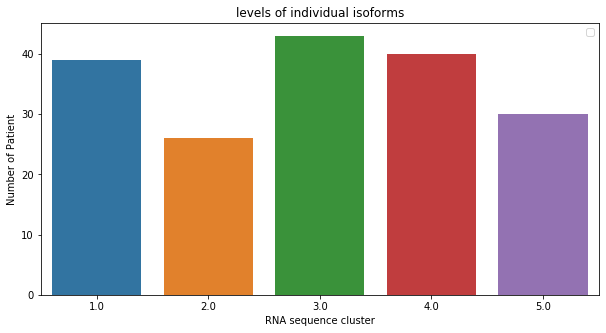

In [13]:
conts_mRNA = col_meta_data.mRNAseq_cluster.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=conts_mRNA.index,y=conts_mRNA.values,)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster')
plt.title('levels of individual isoforms')
plt.legend()

The graph Depicts the Number Of Patients with the Specific RNA Sequence Cluster

In [14]:
col_meta_data.pathologic_stage.value_counts()

stage iib    122
stage iia     29
stage ib      15
stage iv       5
stage ia       5
stage iii      4
stage i        1
Name: pathologic_stage, dtype: int64

Text(0.5, 1.0, 'Vital status vs cancer type ')

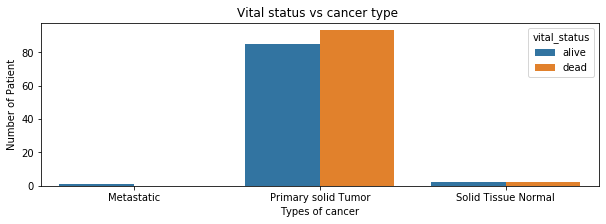

In [15]:
#This Graph will plot the Relationship of person died with the different type of cancer
sample_type_group = col_meta_data.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 3))
sns.barplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group)
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

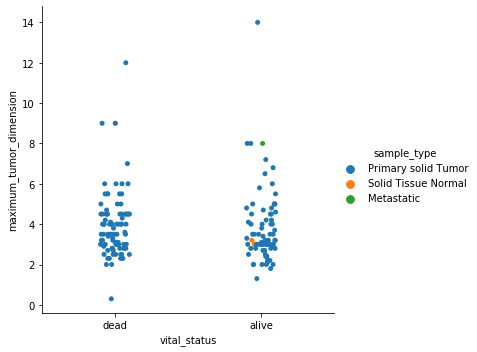

In [16]:
#The Graph for the connection of tumor Dimension and how it affects the Vital Status with the type of cancer
sns.catplot(x='vital_status', y='maximum_tumor_dimension', hue='sample_type', data=col_meta_data)

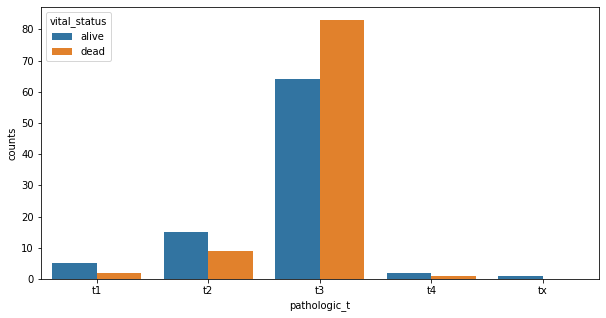

In [17]:
#Graph for the Connectioin of Alive or Not with Pathological COndition 
pathologic_t_group = col_meta_data.groupby(['pathologic_t', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_t', y='counts', hue='vital_status', data=pathologic_t_group)

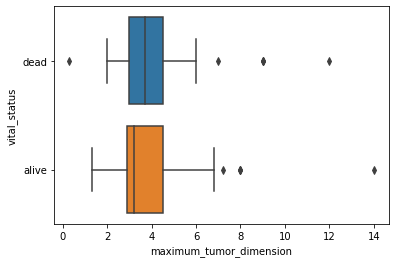

In [18]:
#Graph for the the people who were having tumor of different dmension and how many are alive and dead.
sns.boxplot(x='maximum_tumor_dimension', y='vital_status', data=col_meta_data)

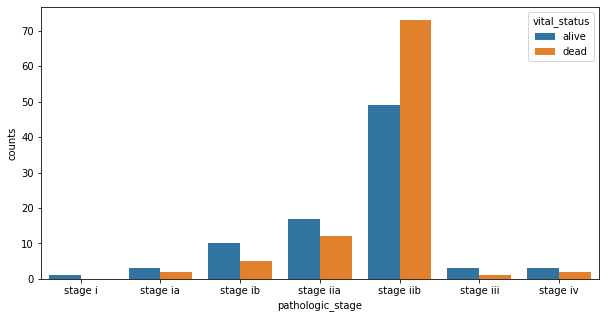

In [19]:
#The Pathological Stage Graph and Count of Having the different stage of Cancer
pathologic_stage_group = col_meta_data.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group)

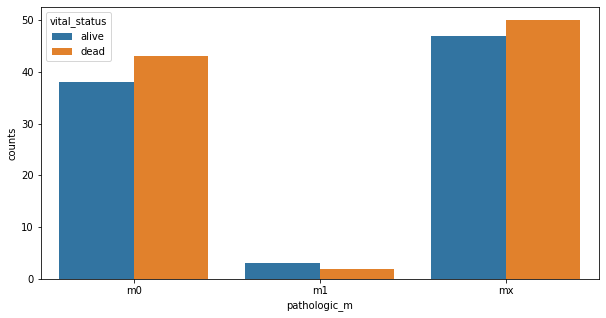

In [20]:
pathologic_m_group = col_meta_data.groupby(['pathologic_m', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_m', y='counts', hue='vital_status', data=pathologic_m_group)

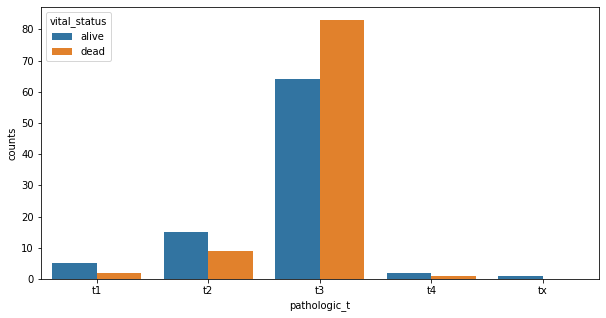

In [21]:
pathologic_t_group = col_meta_data.groupby(['pathologic_t', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_t', y='counts', hue='vital_status', data=pathologic_t_group)

In [22]:
for i, index in enumerate(conts_mRNA.index):
    val = conts_mRNA.values[i]
    val_pcn = round(((val)/sum(conts_mRNA.values))*100, 2)
    print(f"RNA sequence cluster:{index} types patient is {val_pcn}% of total ")

RNA sequence cluster:3.0 types patient is 24.16% of total 
RNA sequence cluster:4.0 types patient is 22.47% of total 
RNA sequence cluster:1.0 types patient is 21.91% of total 
RNA sequence cluster:5.0 types patient is 16.85% of total 
RNA sequence cluster:2.0 types patient is 14.61% of total 


In [23]:
mRNA_seq_group = col_meta_data.groupby(['mRNAseq_cluster', 'vital_status'])['vital_status'].count().reset_index(name='counts')
for cluster_type in mRNA_seq_group.mRNAseq_cluster.unique():
    data = mRNA_seq_group[mRNA_seq_group.mRNAseq_cluster==cluster_type]
    live_pcn = round((data[data['vital_status']=='alive']['counts']
                      /sum(data.counts.values))*100, 2)
    dead_pcn = round((data[data['vital_status']=='dead']['counts']/
                     sum(data.counts.values))*100, 2)
    print(f"mRNAseq_cluster type {cluster_type} patient dead {dead_pcn.values[0]}% times")
    print(f"mRNAseq_cluster type {cluster_type} patient alive {live_pcn.values[0]}% times")
    print("\n")

mRNAseq_cluster type 1.0 patient dead 64.1% times
mRNAseq_cluster type 1.0 patient alive 35.9% times


mRNAseq_cluster type 2.0 patient dead 23.08% times
mRNAseq_cluster type 2.0 patient alive 76.92% times


mRNAseq_cluster type 3.0 patient dead 65.12% times
mRNAseq_cluster type 3.0 patient alive 34.88% times


mRNAseq_cluster type 4.0 patient dead 57.5% times
mRNAseq_cluster type 4.0 patient alive 42.5% times


mRNAseq_cluster type 5.0 patient dead 36.67% times
mRNAseq_cluster type 5.0 patient alive 63.33% times




This Data Shows the Different type of Cluster having mRNAseqCluster who are alive and dead: with this we can inference that type 5 and type 2 are  less risky comparing to type 3 and type 1

In [24]:
print(row_meta_data.index[:5])
print(row_meta_data.shape)
row_meta_data.head()

Index(['SLC35E2', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1'], dtype='object', name='rid')
(18465, 0)


rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1


In [25]:
# Number of missing values in each column of my data
missing_val_count_by_column = (my_data.isnull().sum())
missing_val_count_by_col = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_count_by_col)} columns have missing value, and",
      f"Total {my_data.isnull().sum().sum()} missing values in dataset")

Total 183 columns have missing value, and Total 134954 missing values in dataset


In [26]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_my_data = pd.DataFrame(my_imputer.fit_transform(my_data))

# Imputated dataremoved  putting them back
imputed_my_data.columns = my_data.columns
imputed_my_data.index = my_data.index

imputed_my_data

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.200000,8.000000,7.65,8.100000,8.200000,8.2,7.55,8.450000,...,8.45,7.95,8.3,8.050000,8.2,7.25,7.4,7.350000,7.2,9.050000
A1BG,6.40,5.8,6.400000,5.800000,6.70,6.600000,6.300000,6.5,5.70,6.300000,...,7.10,7.10,6.7,7.000000,6.9,7.10,7.3,7.900000,6.0,6.900000
A1CF,4.70,5.7,3.000000,5.100000,4.40,4.200000,1.600000,6.8,6.00,7.431307,...,5.40,6.40,6.5,4.400000,3.3,3.60,6.2,1.200000,4.9,2.000000
A2BP1,-1.00,1.1,7.577068,7.728812,0.10,7.664173,7.628676,1.7,0.40,-1.500000,...,3.50,1.30,-0.3,7.685606,2.1,2.00,0.0,7.540936,2.0,7.660114
A2LD1,7.50,6.8,7.300000,7.500000,7.40,6.600000,7.100000,6.8,8.00,5.800000,...,6.50,7.30,6.1,6.700000,6.5,6.70,6.7,6.500000,6.9,6.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,9.20,9.3,9.400000,9.400000,9.30,9.900000,9.100000,9.5,8.90,8.300000,...,9.70,9.20,9.5,9.500000,9.4,9.40,9.6,9.200000,8.3,9.500000
ZYX,12.90,12.4,13.500000,12.500000,13.00,12.200000,12.900000,12.6,12.70,12.500000,...,12.40,12.60,13.5,12.500000,12.7,13.60,13.1,13.200000,12.3,12.300000
ZZEF1,10.10,9.8,9.800000,9.700000,10.10,10.400000,9.700000,10.6,10.00,9.900000,...,10.60,9.90,9.8,10.300000,10.4,10.20,9.9,9.800000,9.6,10.900000


In [27]:
# Lets combine col_meta_data and my_data
print(len(my_data.columns.unique()))
print(len(col_meta_data.index.unique()))

183
183


In [28]:
col_to_merge = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage', 'pathologic_m', 'pathologic_n', 'pathologic_t']
participant_id = col_meta_data.participant_id
target_variable = col_meta_data.sample_type
col_meta_data = col_meta_data.set_index('participant_id')
imputed_my_data = imputed_my_data.rename(columns=participant_id).T
#imputed_my_data = imputed_my_data.join(col_meta_data[col_to_merge])
imputed_my_data.head()
for col in col_to_merge:
    imputed_my_data[col] = col_meta_data[col]
imputed_my_data.head(2)

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.0,7.5,6.400000,14.3,10.6,8.8,1.0,...,5.5,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,m0,n1,t3
aab4,8.10,5.8,5.7,1.1,6.8,7.639954,14.0,10.2,5.6,-1.2,...,4.5,Primary solid Tumor,2.0,yes,alive,6.8,stage iib,m0,n1,t2


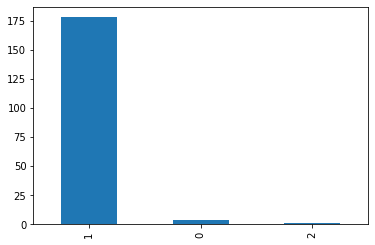

In [29]:
def cat_to_numeric(x):
    if x=='Solid Tissue Normal':
        return 0
    elif x=='Primary solid Tumor':
        return 1
    else:
        return 2
target_variable = target_variable.map(lambda x: cat_to_numeric(x))
target_variable.value_counts().plot(kind='bar')

In [30]:
def remove_nulls(df):

    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print(" {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print(" {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            df[[col]] = df[[col]].apply(lambda x: x.fillna(method='backfill'))
            print(f"{col} has removed {null_values_rows} null values")
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    return df

my_data = remove_nulls(imputed_my_data.select_dtypes(exclude='object'))

 mRNAseq_cluster has 5 null values. It is 2.73% of total rows.
 mRNAseq_cluster is of type float64.

mRNAseq_cluster has removed 5 null values
 maximum_tumor_dimension has 14 null values. It is 7.65% of total rows.
 maximum_tumor_dimension is of type float64.

maximum_tumor_dimension has removed 14 null values
The DataFrame has 2 columns with null values. It is 0.01% of total columns.


/home/ashish/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
imputed_my_data.isnull().sum().sum()

23

In [32]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(imputed_my_data.drop(columns=col_to_merge))

from sklearn.decomposition import PCA as sklearnPCA
n_components = 100
sklearn_pca = sklearnPCA(n_components=n_components)
Y_sklearn = sklearn_pca.fit_transform(X_std)

Text(0.5, 1.0, '2D Transformation of whole data using PCA graph ')

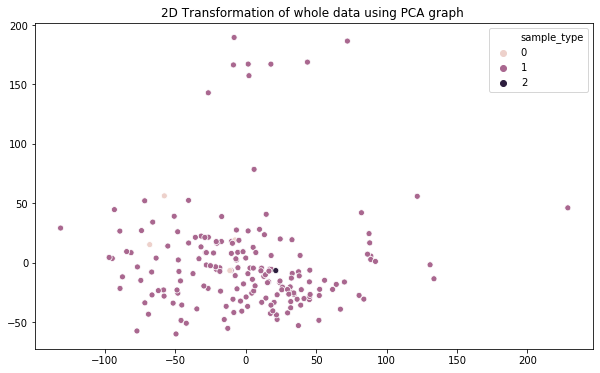

In [33]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=target_variable
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=Y)
plt.title("2D Transformation of whole data using PCA graph ")

TASK-2

Lets Remove the neuroendocrine tumors from the dataset so that it contains only the adenocarcinoma tumor samples. The histology for the different tumor samples is contained in the my_data.

In [34]:
imputed_my_data = imputed_my_data[imputed_my_data['adenocarcinoma_invasion']=='yes']
imputed_my_data.shape

(182, 18474)

Interferons (IFNs) are a group of signaling proteins made and released by host cells in response to the presence of several pathogens, such as viruses, bacteria, parasites, and also tumor cells. Type I interferons (IFNs) are a large subgroup of interferon proteins that help regulate the activity of the immune system. The genes responsible for type 1 Interferons is called Type 1 IFN signature and consists a set of 25 genes in homo sapiens.

In [35]:
ifn_sig = pd.read_csv('type1_IFN.txt', header=None)
ifn_sig.columns = ['Group']
ifn_sig.head()

,Group
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [36]:
ifn_sig_data = imputed_my_data[ifn_sig['Group'].to_list()]
ifn_sig_data.shape

(182, 25)

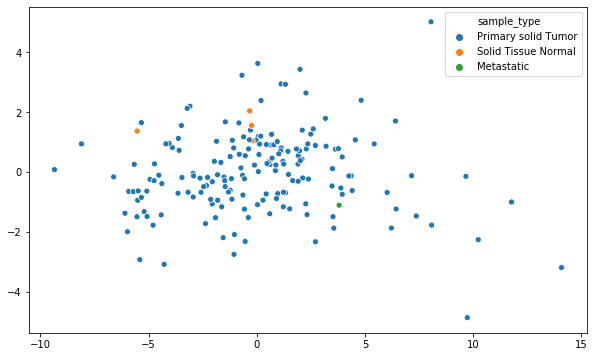

In [37]:
X_std = StandardScaler().fit_transform(ifn_sig_data)
n_components = 2
sklearn_pca = sklearnPCA(n_components=n_components)
X_reduced  = sklearn_pca.fit_transform(X_std)
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_my_data['sample_type'])

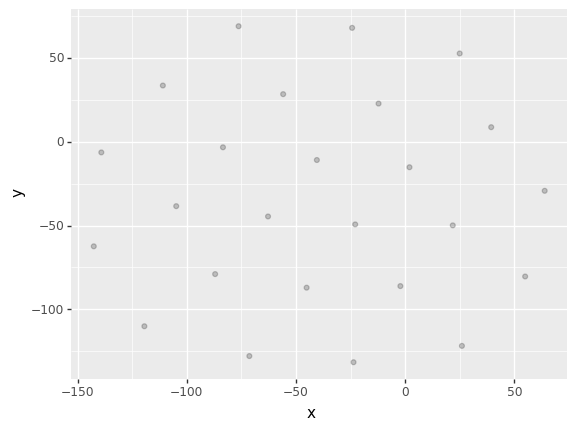

<ggplot: (8744787352845)>

In [38]:
XV = TSNE(n_components=2).\
    fit_transform(ifn_sig_data.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)